## Ejemplo proyecto interactivo - Señal Seno

## Formula de reconstrucción usando la función escalón g(t)


![General Reconstruction Formula (I)](./img/GeneralReconstructionFormula(I).png)
#
Tomado de: *Notas de clase*

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from ipywidgets import interactive
import ipywidgets as widgets

def simulate_sample_hold(frequency, sampling_rate, duration, sampling_period):
    time = np.arange(0, duration, 1/sampling_rate)
    analog_signal = np.sin(2 * np.pi * frequency * time)
    
    sampling_indices = np.arange(0, len(time), int(sampling_period * sampling_rate))
    sampled_signal = np.zeros_like(analog_signal)
    for i in range(len(sampling_indices)-1):
        sampled_signal[sampling_indices[i]:sampling_indices[i+1]] = analog_signal[sampling_indices[i]]
    
    # Gráfico en el dominio del tiempo
    plt.figure(figsize=(15, 5))
    plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
    plt.plot(time, analog_signal, label='Original Analog Signal')
    plt.step(time, sampled_signal, where='post', label='Sampled and Held Signal', color='r')
    plt.title('Interactive Sampling and Holding Simulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    # Análisis en el dominio de la frecuencia usando FFT
    N = len(time)
    yf = fft(sampled_signal)
    xf = fftfreq(N, 1/sampling_rate)[:N//2]
    
    plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.title('Frequency Domain')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Crear widgets para los controles deslizantes
interactive_plot = interactive(simulate_sample_hold, 
                               frequency=widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Frequency:'),
                               sampling_rate=widgets.IntSlider(value=100, min=10, max=500, step=10, description='Sampling Rate:'),
                               duration=widgets.FloatSlider(value=2, min=1, max=5, step=0.1, description='Duration:'),
                               sampling_period=widgets.FloatSlider(value=0.2, min=0.01, max=1, step=0.01, description='Sampling Period:'))
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Frequency:', max=10.0, min=0.1), IntSlider(value=100…

## Formula de reconstrucción usando la función sinc(x)


![General Reconstruction Formula (I)](./img/formula_2.png)
#
Tomado de: *Notas de clase*

## Función Sinc(x)

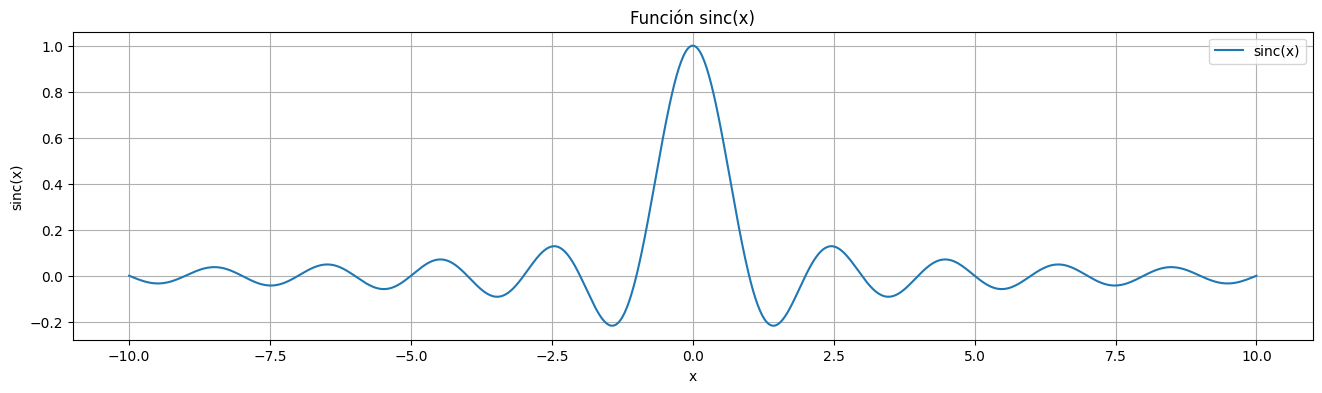

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-10, 10, 1000)
# Calcular la función sinc(x) = sin(pi*x) / (pi*x)
# Nota: np.sinc(x) en NumPy es sin(pi*x) / (pi*x), no sin(x) / x
y = np.sinc(x)

# Graficar la función sinc(x)
plt.figure(figsize=(16, 4))
plt.plot(x, y, label='sinc(x)')
plt.title('Función sinc(x)')
plt.xlabel('x')
plt.ylabel('sinc(x)')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import resample
from ipywidgets import interactive
import ipywidgets as widgets

def simulate_sample_hold_interpolation(frequency, sampling_rate, duration, sampling_period):
    time = np.arange(0, duration, 1/sampling_rate)
    analog_signal = np.sin(2 * np.pi * frequency * time)
    
    sampling_indices = np.arange(0, len(time), int(sampling_period * sampling_rate))
    sampled_signal = analog_signal[sampling_indices]
    sampled_time = time[sampling_indices]
    
    # Reconstrucción de la señal usando interpolación ideal con sinc
    reconstructed_signal = np.zeros_like(time)
    for i, sample in enumerate(sampled_signal):
        reconstructed_signal += sample * np.sinc((time - sampled_time[i]) * sampling_rate)
    
    # Gráfico en el dominio del tiempo
    plt.figure(figsize=(15, 5))
    plt.subplot(2, 1, 1)
    plt.plot(time, analog_signal, label='Original Analog Signal', alpha=0.5)
    plt.scatter(sampled_time, sampled_signal, color='red', label='Sampled Points')
    plt.plot(time, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
    plt.title('Interactive Sampling, Holding, and Ideal Interpolation Simulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    # Análisis en el dominio de la frecuencia usando FFT
    N = len(time)
    yf = fft(reconstructed_signal)
    xf = fftfreq(N, 1/sampling_rate)[:N//2]
    
    plt.subplot(2, 1, 2)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.title('Frequency Domain of Reconstructed Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Crear widgets para los controles deslizantes
interactive_plot = interactive(simulate_sample_hold_interpolation, 
                               frequency=widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Frequency:'),
                               sampling_rate=widgets.IntSlider(value=100, min=10, max=500, step=10, description='Sampling Rate:'),
                               duration=widgets.FloatSlider(value=2, min=1, max=5, step=0.1, description='Duration:'),
                               sampling_period=widgets.FloatSlider(value=0.2, min=0.01, max=1, step=0.01, description='Sampling Period:'))
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Frequency:', max=10.0, min=0.1), IntSlider(value=100…